## **An Analysis of the Popular Songs in Spotify Philippines**

### **Introduction**

Streaming music have been a part of many people's lifestyle these past few years. According to [Statista](https://www.statista.com/forecasts/1258049/music-streaming-svod-users-philippines), the Philippines have 5.17 million users of music streaming services as of 2023. One of the most popular music streaming app in the Philippines in Spotify.

In this analysis, we will discover music, artists, and genres that have been popular in the Philippines from January 2017 to October 2023, through Spotify's Top 200 Charts dataset. The dataset was obtained from [Kaggle - Spotify Daily Top 200 Tracks in the Philippines](https://www.kaggle.com/datasets/jcacperalta/spotify-daily-top-200-ph), and containes the following columns and data:

Column Name | Description
----- | -----
date |chart date
position |track's position in the Top 200 Charts
track_id |unique track ID
track_name |name of the track/song
artist |artist(s) of the track/song
stream |stream duration

### Import Dataset and Necessary Packages

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib.ticker import FuncFormatter

In [276]:
df = pd.read_csv('D:\Documents\CSV Datasets\Spotify Songs\ph_spotify_daily_charts.csv')

In [277]:
df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


### **Data Exploration and Data Cleaning**

In [278]:
## Check the number of rows and columns in the dataset
print(df.shape)

(495798, 6)


In [279]:
## Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495798 entries, 0 to 495797
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        495798 non-null  object
 1   position    495798 non-null  int64 
 2   track_id    495798 non-null  object
 3   track_name  495788 non-null  object
 4   artist      495788 non-null  object
 5   streams     495798 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 22.7+ MB


In [280]:
## Check presence of null values
df.isnull().sum()

date           0
position       0
track_id       0
track_name    10
artist        10
streams        0
dtype: int64

#### **Findings**

1. The datatype for the `date` is wrong. However, we will create separate columns from this column to improve the analysis.
2. The dataset contains null values for `track_name` and `artist` columns. These columns should not have null values, so these rows will be dropped.

### Data Cleaning

In [281]:
## Drop null values in the dataset
df = df.dropna(axis=0)

In [282]:
## Convert 'date' column into datetime
df['date'] = pd.to_datetime(df['date'])

## Create new column 'year'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495788 entries, 0 to 495797
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        495788 non-null  datetime64[ns]
 1   position    495788 non-null  int64         
 2   track_id    495788 non-null  object        
 3   track_name  495788 non-null  object        
 4   artist      495788 non-null  object        
 5   streams     495788 non-null  int64         
 6   year        495788 non-null  int32         
 7   month       495788 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(3)
memory usage: 30.3+ MB


In [284]:
df.tail()

,date,position,track_id,track_name,artist,streams,year,month
495793,2023-10-15,196,6wdCelHrPh7UfliNjwRTUv,Leaves,Ben&Ben,80569,2023,10
495794,2023-10-15,197,3afkJSKX0EAMsJXTZnDXXJ,Strawberries & Cigarettes,Troye Sivan,80407,2023,10
495795,2023-10-15,198,4xqrdfXkTW4T0RauPLv3WA,Heather,Conan Gray,80398,2023,10
495796,2023-10-15,199,1fDFHXcykq4iw8Gg7s5hG9,About You,The 1975,80362,2023,10
495797,2023-10-15,200,3uWHNTmc2FFYmxlULgJ03E,Shot Puno,juan karlos,80289,2023,10


The dataset is now free from null values, and have two new columns `year` and `month`, which corresponds to the year and month respectively when the track placed in the charts.

### Descriptive Statistics of the Data

In [285]:
df.describe()

,date,position,streams,year,month
count,495788,495788.000000,4.957880e+05,495788.000000,495788.000000
mean,2020-05-24 00:23:09.439034368,100.500875,6.548546e+04,2019.906861,6.379184
min,2017-01-01 00:00:00,1.000000,1.100400e+04,2017.000000,1.000000
25%,2018-09-12 00:00:00,51.000000,2.962600e+04,2018.000000,3.000000
50%,2020-05-24 00:00:00,101.000000,4.423800e+04,2020.000000,6.000000
75%,2022-02-03 00:00:00,151.000000,8.135000e+04,2022.000000,9.000000
max,2023-10-15 00:00:00,200.000000,1.644340e+06,2023.000000,12.000000
std,NaN,57.734229,5.774237e+04,1.958132,3.397685


The dataset contains top 200 tracks from **2017** to **2023**. The mean stream duration is **65,485.46**, with a maximum and minimum duration of **1,644,340** and **11,004.00** respectively.

### **Data Visualization**

### Top Tracks per Year

In [286]:
## Create separate datasets per year
df_2017 = df[df['year'] == 2017]
df_2018 = df[df['year'] == 2018]
df_2019 = df[df['year'] == 2019]
df_2020 = df[df['year'] == 2020]
df_2021 = df[df['year'] == 2021]
df_2022 = df[df['year'] == 2022]
df_2023 = df[df['year'] == 2023]

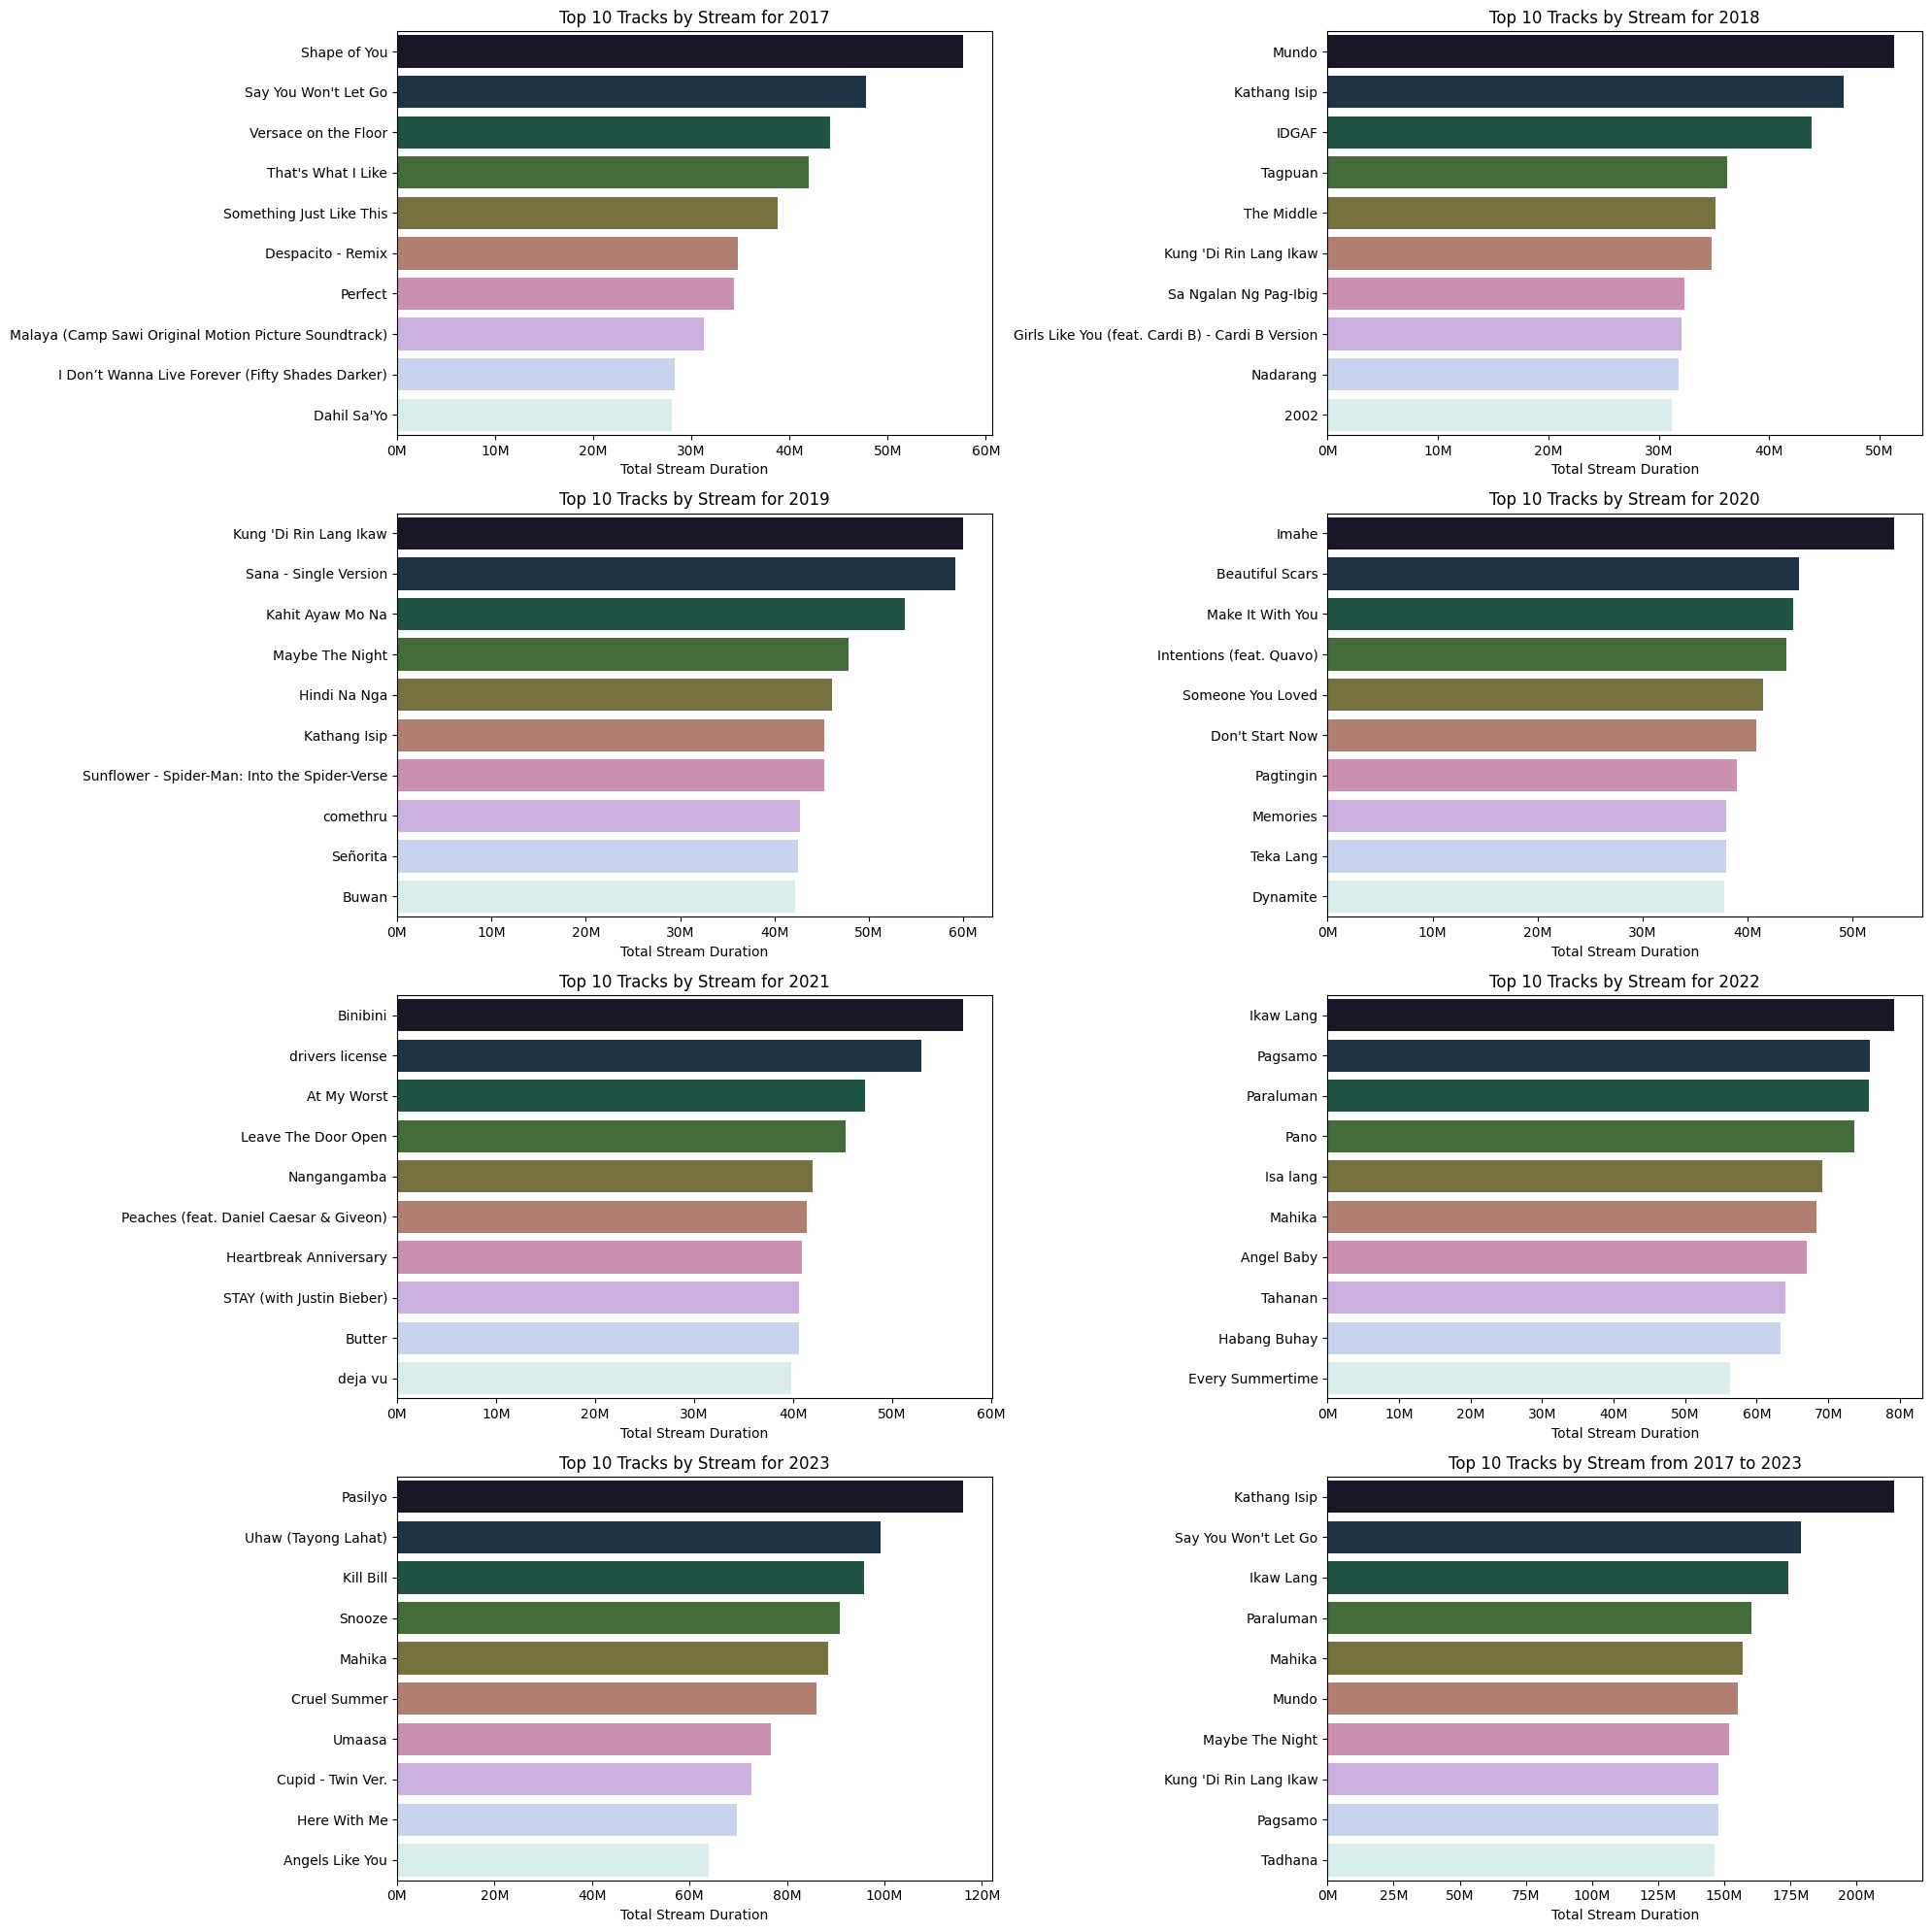

In [287]:
fig, axes = plt.subplots(4,2, figsize=(20,20))

def ticks_format(value, _):
    return f'{int(value / 1e6)}M'

## For 2017 charts
df_2017_cons = df_2017.groupby(['track_name','artist'])['streams'].sum().nlargest(10).reset_index()
df_2017_cons['track_name'] = df_2017_cons['track_name'].replace('I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"',
                                                                'I Don’t Wanna Live Forever (Fifty Shades Darker)')
sns.barplot(data=df_2017_cons, x='streams', y='track_name', ax=axes[0,0], palette=sns.color_palette('cubehelix',10))
axes[0,0].set_title('Top 10 Tracks by Stream for 2017')
axes[0,0].set_xlabel(xlabel='Total Stream Duration')
axes[0,0].set_ylabel(ylabel='')
axes[0,0].set_xticklabels
axes[0,0].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2018 charts
df_2018_cons = df_2018.groupby(['track_name','artist'])['streams'].sum().nlargest(10).reset_index()
df_2018_cons['track_name'] = df_2018_cons['track_name'].replace('I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"',
                                                                'I Don’t Wanna Live Forever (Fifty Shades Darker)')
sns.barplot(data=df_2018_cons, x='streams', y='track_name', ax=axes[0,1], palette=sns.color_palette('cubehelix',10))
axes[0,1].set_title('Top 10 Tracks by Stream for 2018')
axes[0,1].set_xlabel(xlabel='Total Stream Duration')
axes[0,1].set_ylabel(ylabel='')
axes[0,1].set_xticklabels
axes[0,1].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2019 charts
df_2019_cons = df_2019.groupby(['track_name','artist'])['streams'].sum().nlargest(10).reset_index()
df_2019_cons['track_name'] = df_2019_cons['track_name'].replace('I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"',
                                                                'I Don’t Wanna Live Forever (Fifty Shades Darker)')
sns.barplot(data=df_2019_cons, x='streams', y='track_name', ax=axes[1,0], palette=sns.color_palette('cubehelix',10))
axes[1,0].set_title('Top 10 Tracks by Stream for 2019')
axes[1,0].set_xlabel(xlabel='Total Stream Duration')
axes[1,0].set_ylabel(ylabel='')
axes[1,0].set_xticklabels
axes[1,0].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2020 charts
df_2020_cons = df_2020.groupby(['track_name','artist'])['streams'].sum().nlargest(10).reset_index()
df_2020_cons['track_name'] = df_2020_cons['track_name'].replace('I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"',
                                                                'I Don’t Wanna Live Forever (Fifty Shades Darker)')
sns.barplot(data=df_2020_cons, x='streams', y='track_name', ax=axes[1,1], palette=sns.color_palette('cubehelix',10))
axes[1,1].set_title('Top 10 Tracks by Stream for 2020')
axes[1,1].set_xlabel(xlabel='Total Stream Duration')
axes[1,1].set_ylabel(ylabel='')
axes[1,1].set_xticklabels
axes[1,1].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2021 charts
df_2021_cons = df_2021.groupby(['track_name','artist'])['streams'].sum().nlargest(10).reset_index()
df_2021_cons['track_name'] = df_2021_cons['track_name'].replace('I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"',
                                                                'I Don’t Wanna Live Forever (Fifty Shades Darker)')
sns.barplot(data=df_2021_cons, x='streams', y='track_name', ax=axes[2,0], palette=sns.color_palette('cubehelix',10))
axes[2,0].set_title('Top 10 Tracks by Stream for 2021')
axes[2,0].set_xlabel(xlabel='Total Stream Duration')
axes[2,0].set_ylabel(ylabel='')
axes[2,0].set_xticklabels
axes[2,0].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2022 charts
df_2022_cons = df_2022.groupby(['track_name','artist'])['streams'].sum().nlargest(10).reset_index()
df_2022_cons['track_name'] = df_2022_cons['track_name'].replace('I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"',
                                                                'I Don’t Wanna Live Forever (Fifty Shades Darker)')
sns.barplot(data=df_2022_cons, x='streams', y='track_name', ax=axes[2,1], palette=sns.color_palette('cubehelix',10))
axes[2,1].set_title('Top 10 Tracks by Stream for 2022')
axes[2,1].set_xlabel(xlabel='Total Stream Duration')
axes[2,1].set_ylabel(ylabel='')
axes[2,1].set_xticklabels
axes[2,1].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2023 charts
df_2023_cons = df_2023.groupby(['track_name','artist'])['streams'].sum().nlargest(10).reset_index()
df_2023_cons['track_name'] = df_2023_cons['track_name'].replace('I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"',
                                                                'I Don’t Wanna Live Forever (Fifty Shades Darker)')
sns.barplot(data=df_2023_cons, x='streams', y='track_name', ax=axes[3,0], palette=sns.color_palette('cubehelix',10))
axes[3,0].set_title('Top 10 Tracks by Stream for 2023')
axes[3,0].set_xlabel(xlabel='Total Stream Duration')
axes[3,0].set_ylabel(ylabel='')
axes[3,0].set_xticklabels
axes[3,0].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2017 to 2023 charts
df_cons = df.groupby(['track_name','artist'])['streams'].sum().nlargest(10).reset_index()
df_cons['track_name'] = df_cons['track_name'].replace('I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"',
                                                      'I Don’t Wanna Live Forever (Fifty Shades Darker)')
sns.barplot(data=df_cons, x='streams', y='track_name', ax=axes[3,1], palette=sns.color_palette('cubehelix',10))
axes[3,1].set_title('Top 10 Tracks by Stream from 2017 to 2023')
axes[3,1].set_xlabel(xlabel='Total Stream Duration')
axes[3,1].set_ylabel(ylabel='')
axes[3,1].set_xticklabels
axes[3,1].xaxis.set_major_formatter(FuncFormatter(ticks_format))

plt.tight_layout()
plt.show()

In [288]:
combined_trackname_artist = pd.DataFrame({'2017 Top Track': df_2017_cons['track_name'].values + ' - ' + df_2017_cons['artist'].values,
                                          '2018 Top Track': df_2018_cons['track_name'].values + ' - ' + df_2018_cons['artist'].values,
                                          '2019 Top Track': df_2019_cons['track_name'].values + ' - ' + df_2019_cons['artist'].values,
                                          '2020 Top Track': df_2020_cons['track_name'].values + ' - ' + df_2020_cons['artist'].values,
                                          '2021 Top Track': df_2021_cons['track_name'].values + ' - ' + df_2021_cons['artist'].values,
                                          '2022 Top Track': df_2022_cons['track_name'].values + ' - ' + df_2022_cons['artist'].values,
                                          '2023 Top Track': df_2023_cons['track_name'].values + ' - ' + df_2023_cons['artist'].values,
                                          })

combined_trackname_artist.head(10)

,2017 Top Track,2018 Top Track,2019 Top Track,2020 Top Track,2021 Top Track,2022 Top Track,2023 Top Track
0,Shape of You - Ed Sheeran,Mundo - IV Of Spades,Kung 'Di Rin Lang Ikaw - December Avenue,Imahe - Magnus Haven,Binibini - Zack Tabudlo,Ikaw Lang - NOBITA,Pasilyo - SunKissed Lola
1,Say You Won't Let Go - James Arthur,Kathang Isip - Ben&Ben,Sana - Single Version - I Belong to the Zoo,Beautiful Scars - Maximillian,drivers license - Olivia Rodrigo,Pagsamo - Arthur Nery,Uhaw (Tayong Lahat) - Dilaw
2,Versace on the Floor - Bruno Mars,IDGAF - Dua Lipa,Kahit Ayaw Mo Na - This Band,Make It With You - Ben&Ben,At My Worst - Pink Sweat$,Paraluman - Adie,Kill Bill - SZA
3,That's What I Like - Bruno Mars,Tagpuan - Moira Dela Torre,Maybe The Night - Ben&Ben,Intentions (feat. Quavo) - Justin Bieber,Leave The Door Open - Bruno Mars,Pano - Zack Tabudlo,Snooze - SZA
4,Something Just Like This - The Chainsmokers,The Middle - Zedd,Hindi Na Nga - This Band,Someone You Loved - Lewis Capaldi,Nangangamba - Zack Tabudlo,Isa lang - Arthur Nery,Mahika - Adie
5,Despacito - Remix - Luis Fonsi,Kung 'Di Rin Lang Ikaw - December Avenue,Kathang Isip - Ben&Ben,Don't Start Now - Dua Lipa,Peaches (feat. Daniel Caesar & Giveon) - Justi...,Mahika - Adie,Cruel Summer - Taylor Swift
6,Perfect - Ed Sheeran,Sa Ngalan Ng Pag-Ibig - December Avenue,Sunflower - Spider-Man: Into the Spider-Verse ...,Pagtingin - Ben&Ben,Heartbreak Anniversary - Giveon,Angel Baby - Troye Sivan,Umaasa - Calein
7,Malaya (Camp Sawi Original Motion Picture Soun...,Girls Like You (feat. Cardi B) - Cardi B Versi...,comethru - Jeremy Zucker,Memories - Maroon 5,STAY (with Justin Bieber) - The Kid LAROI,Tahanan - Adie,Cupid - Twin Ver. - FIFTY FIFTY
8,I Don’t Wanna Live Forever (Fifty Shades Darke...,Nadarang - Shanti Dope,Señorita - Shawn Mendes,Teka Lang - Emman,Butter - BTS,Habang Buhay - Zack Tabudlo,Here With Me - d4vd
9,Dahil Sa'Yo - Inigo Pascual,2002 - Anne-Marie,Buwan - juan karlos,Dynamite - BTS,deja vu - Olivia Rodrigo,Every Summertime - NIKI,Angels Like You - Miley Cyrus


1. The tracks that received the most number of streams for each year are the following:
   - 2017: Shape of You
   - 2018: Mundo
   - 2019: Kung 'Di Rin Lang Ikaw
   - 2020: Imahe
   - 2021: Binibini
   - 2022: Ikaw Lang
   - 2023: Pasilyo
   - 2017 to 2023: Kathang Isip
  
  
2. These are the number of OPM songs in the Top 10 for each year:
   - 2017: 2/10
   - 2018: 6/10
   - 2019: 7/10
   - 2020: 4/10
   - 2021: 2/10
   - 2022: 8/10
   - 2023: 3/10

### Top Artists per Year

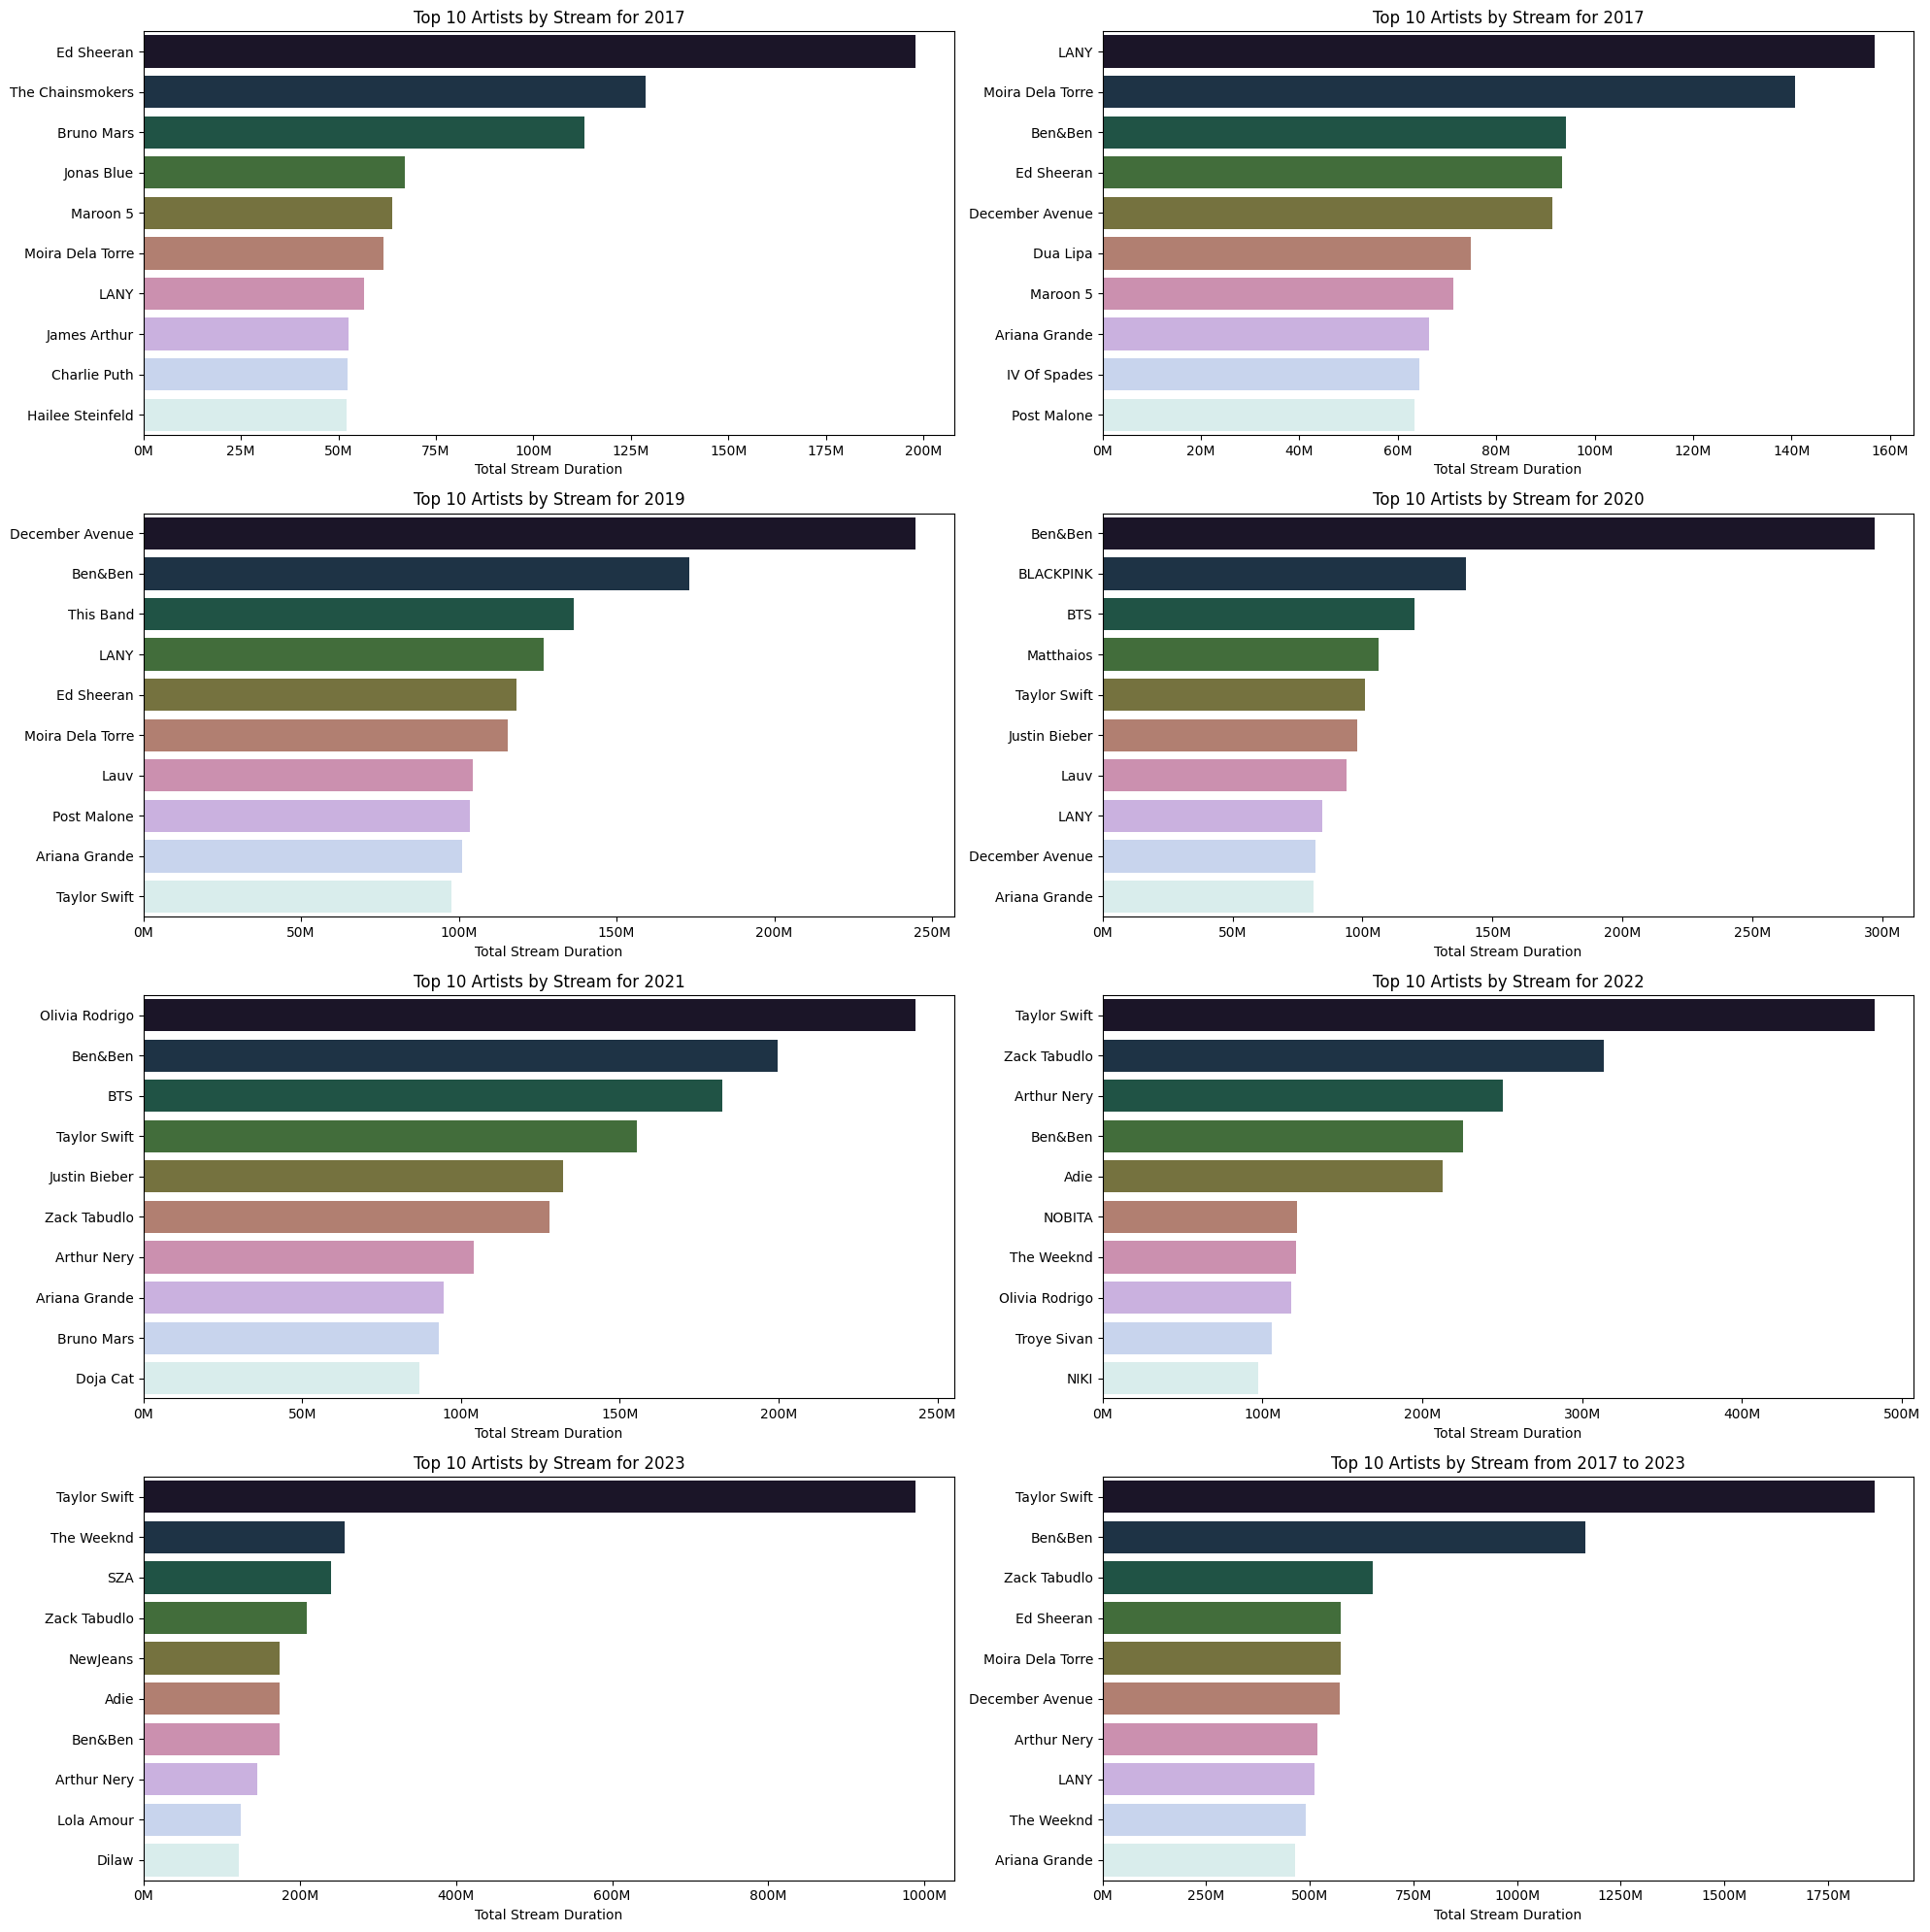

In [273]:
fig, axes = plt.subplots(4,2, figsize=(20,20))

def ticks_format(value, _):
    return f'{int(value / 1e6)}M'

## For 2017 charts
df_2017_cons_a = df_2017.groupby('artist')['streams'].sum().nlargest(10).reset_index()
sns.barplot(data=df_2017_cons_a, x='streams', y='artist', ax=axes[0,0], palette=sns.color_palette('cubehelix',10))
axes[0,0].set_title('Top 10 Artists by Stream for 2017')
axes[0,0].set_xlabel(xlabel='Total Stream Duration')
axes[0,0].set_ylabel(ylabel='')
axes[0,0].set_xticklabels
axes[0,0].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2018 charts
df_2018_cons_a = df_2018.groupby('artist')['streams'].sum().nlargest(10).reset_index()
sns.barplot(data=df_2018_cons_a, x='streams', y='artist', ax=axes[0,1], palette=sns.color_palette('cubehelix',10))
axes[0,1].set_title('Top 10 Artists by Stream for 2017')
axes[0,1].set_xlabel(xlabel='Total Stream Duration')
axes[0,1].set_ylabel(ylabel='')
axes[0,1].set_xticklabels
axes[0,1].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2019 charts
df_2019_cons_a = df_2019.groupby('artist')['streams'].sum().nlargest(10).reset_index()
sns.barplot(data=df_2019_cons_a, x='streams', y='artist', ax=axes[1,0], palette=sns.color_palette('cubehelix',10))
axes[1,0].set_title('Top 10 Artists by Stream for 2019')
axes[1,0].set_xlabel(xlabel='Total Stream Duration')
axes[1,0].set_ylabel(ylabel='')
axes[1,0].set_xticklabels
axes[1,0].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2020 charts
df_2020_cons_a = df_2020.groupby('artist')['streams'].sum().nlargest(10).reset_index()
sns.barplot(data=df_2020_cons_a, x='streams', y='artist', ax=axes[1,1], palette=sns.color_palette('cubehelix',10))
axes[1,1].set_title('Top 10 Artists by Stream for 2020')
axes[1,1].set_xlabel(xlabel='Total Stream Duration')
axes[1,1].set_ylabel(ylabel='')
axes[1,1].set_xticklabels
axes[1,1].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2021 charts
df_2021_cons_a = df_2021.groupby('artist')['streams'].sum().nlargest(10).reset_index()
sns.barplot(data=df_2021_cons_a, x='streams', y='artist', ax=axes[2,0], palette=sns.color_palette('cubehelix',10))
axes[2,0].set_title('Top 10 Artists by Stream for 2021')
axes[2,0].set_xlabel(xlabel='Total Stream Duration')
axes[2,0].set_ylabel(ylabel='')
axes[2,0].set_xticklabels
axes[2,0].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2022 charts
df_2022_cons_a = df_2022.groupby('artist')['streams'].sum().nlargest(10).reset_index()
sns.barplot(data=df_2022_cons_a, x='streams', y='artist', ax=axes[2,1], palette=sns.color_palette('cubehelix',10))
axes[2,1].set_title('Top 10 Artists by Stream for 2022')
axes[2,1].set_xlabel(xlabel='Total Stream Duration')
axes[2,1].set_ylabel(ylabel='')
axes[2,1].set_xticklabels
axes[2,1].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2023 charts
df_2023_cons_a = df_2023.groupby('artist')['streams'].sum().nlargest(10).reset_index()
sns.barplot(data=df_2023_cons_a, x='streams', y='artist', ax=axes[3,0], palette=sns.color_palette('cubehelix',10))
axes[3,0].set_title('Top 10 Artists by Stream for 2023')
axes[3,0].set_xlabel(xlabel='Total Stream Duration')
axes[3,0].set_ylabel(ylabel='')
axes[3,0].set_xticklabels
axes[3,0].xaxis.set_major_formatter(FuncFormatter(ticks_format))

## For 2017 to 2023 charts
df_cons_a = df.groupby('artist')['streams'].sum().nlargest(10).reset_index()
sns.barplot(data=df_cons_a, x='streams', y='artist', ax=axes[3,1], palette=sns.color_palette('cubehelix',10))
axes[3,1].set_title('Top 10 Artists by Stream from 2017 to 2023')
axes[3,1].set_xlabel(xlabel='Total Stream Duration')
axes[3,1].set_ylabel(ylabel='')
axes[3,1].set_xticklabels
axes[3,1].xaxis.set_major_formatter(FuncFormatter(ticks_format))

plt.tight_layout()
plt.show()